# TP Final - Redes Neuronales Convolucionales
## Mellino, Natalia - Introducción al Aprendizaje Automatizado

In [1]:
# Imports

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
def graficar_resultados(history, model, title):
  # Calculamos el error a partir del accuracy para poder graficar
  train_error = list(map(lambda x: 1 - x, history.history['accuracy']))
  val_error = list(map(lambda x: 1 - x,  history.history['val_accuracy']))

  xs = list(range(1, len(train_error) + 1))

  # Graficamos
  plt.plot(xs, train_error, label='Train Error')
  plt.plot(xs, val_error, label = 'Val Error')
  plt.xlabel('Epoca')
  plt.ylabel('Error')
  plt.legend()
  plt.title(title)
  plt.show()

  # Error de test

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0
  test_loss, test_acc = model.evaluate(test_images,  test_labels)
  print(f"Test error en el modelo final: {1 - test_acc}")

## Ejercicio 1

In [9]:
def ej1(model):

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )

  return history, model

In [11]:
# Agregamos las capas
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(128))
model1.add(layers.Dense(128))
model1.add(layers.Dense(10))

history1, model1 = ej1(model1)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5149 - accuracy: 0.4418 - val_loss: 1.1985 - val_accuracy: 0.5771
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1222 - accuracy: 0.6001 - val_loss: 1.0246 - val_accuracy: 0.6378
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9404 - accuracy: 0.6672 - val_loss: 0.9508 - val_accuracy: 0.6660
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8252 - accuracy: 0.7079 - val_loss: 0.9101 - val_accuracy: 0.6824
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7322 - accuracy: 0.7409 - val_loss: 0.8578 - val_accuracy: 0.6999
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6523 - accuracy: 0.7698 - val_loss: 0.9439 - val_accuracy: 0.6777
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5858 - accuracy: 0.7927 - val_loss: 0.8910 - val_accuracy:

### Resultados

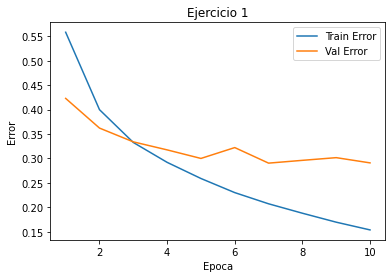

313/313 [==============================] - 1s 3ms/step - loss: 0.9999 - accuracy: 0.7081
Test error en el modelo final: 0.29189997911453247


In [12]:
graficar_resultados(history1, model1, 'Ejercicio 1')


### Conclusiones

ta malisimo la verda creo que hay un toq de overfitting 

## Ejercicio 2

In [13]:
def ej2(models):
  results = []
  for model in models:

    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalizamos como lo hace el ejemplo del tutorial
    train_images, test_images = train_images / 255.0, test_images / 255.0


    # Separamos conjunto de validación
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=0
    )

    # Compilamos y entrenamos

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    history = model.fit(
        train_images, 
        train_labels, 
        epochs=20,
        validation_data=(val_images, val_labels)
    )

    results.append((history, model))

  return results

In [14]:
ms2 = []
for p in [0.2, 0.5]:
    # Agregamos las capas
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model2.add(layers.Flatten())
    model2.add(layers.Dense(64))
    model2.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(10))

    ms2.append(model2)

results2 = ej2(ms2)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5920 - accuracy: 0.4110 - val_loss: 1.2758 - val_accuracy: 0.5336
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1791 - accuracy: 0.5774 - val_loss: 1.1381 - val_accuracy: 0.5873
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0146 - accuracy: 0.6402 - val_loss: 0.9368 - val_accuracy: 0.6644
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9068 - accuracy: 0.6823 - val_loss: 0.8687 - val_accuracy: 0.6942
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8304 - accuracy: 0.7070 - val_loss: 0.8923 - val_accuracy: 0.6821
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7708 - accuracy: 0.7314 - val_loss: 0.8794 - val_accuracy: 0.6960
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7169 - accuracy: 0.7487 - val_loss: 0.8143 - val_accuracy:

### Resultados

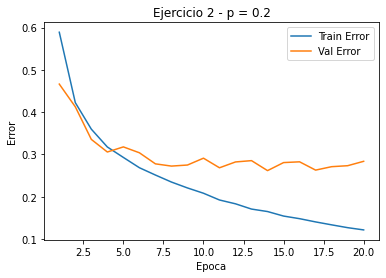

313/313 [==============================] - 1s 3ms/step - loss: 1.0225 - accuracy: 0.7182
Test error en el modelo final: 0.28179997205734253


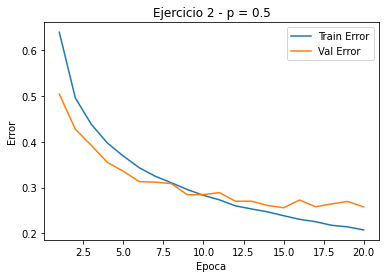

313/313 [==============================] - 1s 3ms/step - loss: 0.8134 - accuracy: 0.7372
Test error en el modelo final: 0.2627999782562256


In [15]:
# p = 0.2

history2a, model2a = results2[0]
graficar_resultados(history2a, model2a, 'Ejercicio 2 - p = 0.2')

history2b, model2b = results2[1]
graficar_resultados(history2b, model2b, 'Ejercicio 2 - p = 0.5')



### Conclusiones

Hay menos sobreajuste con p = 0.5

## Ejercicio 3

In [3]:
def ej3(model):

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [16]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

# Agregamos las capas
model3 = models.Sequential()
model3.add(data_augmentation)
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model3.add(layers.Dense(128))
model3.add(layers.Dense(128))
model3.add(layers.Dense(10))

history3, mdl3 = ej3(model3)

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8405 - accuracy: 0.3135 - val_loss: 1.6499 - val_accuracy: 0.4213
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5636 - accuracy: 0.4247 - val_loss: 1.4497 - val_accuracy: 0.4888
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4640 - accuracy: 0.4645 - val_loss: 1.3201 - val_accuracy: 0.5390
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4048 - accuracy: 0.4915 - val_loss: 1.3040 - val_accuracy: 0.5491
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3482 - accuracy: 0.5168 - val_loss: 1.2192 - val_accuracy: 0.5769
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3143 - accuracy: 0.5275 - val_loss: 1.2155 - val_accuracy: 0.5734
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2815 - accuracy: 0.5423 - val_loss: 1.1659 - val_accurac

### Resultados

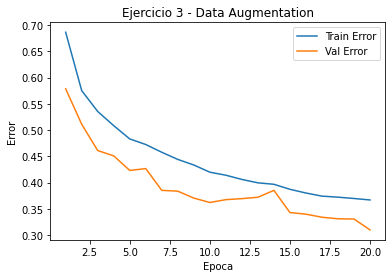

313/313 [==============================] - 1s 3ms/step - loss: 0.9481 - accuracy: 0.6824
Test error en el modelo final: 0.3176000118255615


In [17]:
graficar_resultados(history3, mdl3, 'Ejercicio 3 - Data Augmentation')

### Conclusiones

Si hay menos sobreajuste

## Ejercicio 4

### Ejercicio 1 mejorado

In [21]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(64))
# model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

history, mdl = ej1(model)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5183 - accuracy: 0.4457 - val_loss: 1.1825 - val_accuracy: 0.5829
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0334 - accuracy: 0.6346 - val_loss: 0.9254 - val_accuracy: 0.6721
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8446 - accuracy: 0.7009 - val_loss: 0.9284 - val_accuracy: 0.6781
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7234 - accuracy: 0.7468 - val_loss: 0.8003 - val_accuracy: 0.7204
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6360 - accuracy: 0.7753 - val_loss: 0.7753 - val_accuracy: 0.7273
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5519 - accuracy: 0.8053 - val_loss: 0.8334 - val_accuracy: 0.7139
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4814 - accuracy: 0.8284 - val_loss: 0.8851 - val_accuracy:

### Resultados - Ejercicio 1 Mejorado

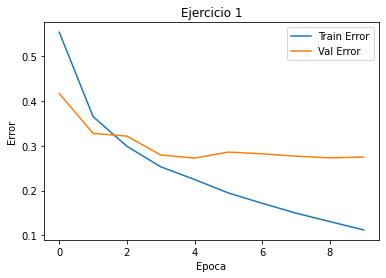

313/313 [==============================] - 1s 4ms/step - loss: 1.0379 - accuracy: 0.7221
Test error en el modelo final 0.27789998054504395


In [22]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(list(train_error), label='Train Error')
plt.plot(list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 1')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

test_loss, test_acc = mdl.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final {1 - test_acc}")


### Ejercicio 2 mejorado

In [24]:
ms = []
for p in [0.2, 0.5]:

    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Dense(10))

    ms.append(model)

modelos = ej2(ms)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5102 - accuracy: 0.4458 - val_loss: 1.1353 - val_accuracy: 0.6012
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0442 - accuracy: 0.6317 - val_loss: 1.0516 - val_accuracy: 0.6324
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8683 - accuracy: 0.6941 - val_loss: 0.9163 - val_accuracy: 0.6766
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7493 - accuracy: 0.7365 - val_loss: 0.7962 - val_accuracy: 0.7253
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6624 - accuracy: 0.7678 - val_loss: 0.8016 - val_accuracy: 0.7207
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5904 - accuracy: 0.7918 - val_loss: 0.7855 - val_accuracy: 0.7389
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5261 - accuracy: 0.8131 - val_loss: 0.7898 - val_accuracy

### Resultados - Ejercicio 2 Mejorado

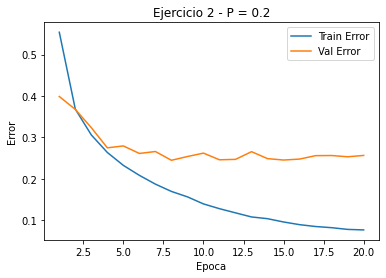

313/313 [==============================] - 1s 4ms/step - loss: 1.1525 - accuracy: 0.7387
Test error en el modelo final para p = 0.2: 0.2613000273704529


In [25]:
graficar_resultados(history, modelos[0], 'Ejercicio 2 (mejorado) - Dropout')


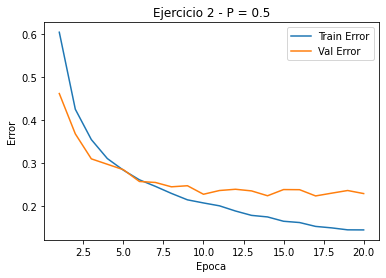

313/313 [==============================] - 1s 4ms/step - loss: 0.8133 - accuracy: 0.7678
Test error en el modelo final para p = 0.5: 0.232200026512146


In [26]:
graficar_resultados(history, modelos[1], 'Ejercicio 2 (mejorado) - Dropout')


### Ejercicio 3 mejorado

In [4]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

# Agregamos las capas
model = tf.keras.models.Sequential()
model.add(data_augmentation)
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model.add(layers.Dense(10))

history, model = ej3(model)

Epoch 1/20
1250/1250 [==============================] - 18s 6ms/step - loss: 1.5815 - accuracy: 0.4168 - val_loss: 1.2279 - val_accuracy: 0.5519
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1523 - accuracy: 0.5893 - val_loss: 1.0030 - val_accuracy: 0.6497
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9770 - accuracy: 0.6551 - val_loss: 0.8964 - val_accuracy: 0.6852
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8684 - accuracy: 0.6944 - val_loss: 0.8195 - val_accuracy: 0.7160
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7958 - accuracy: 0.7232 - val_loss: 0.7665 - val_accuracy: 0.7373
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7340 - accuracy: 0.7446 - val_loss: 0.7410 - val_accuracy: 0.7450
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6883 - accuracy: 0.7600 - val_loss: 0.7250 - val_accuracy

### Resultados - Ejercicio 3 mejorado

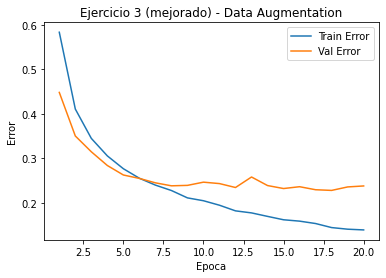

313/313 [==============================] - 1s 4ms/step - loss: 0.8182 - accuracy: 0.7588
Test error en el modelo final: 0.24119997024536133


In [6]:
graficar_resultados(history, model, 'Ejercicio 3 (mejorado) - Data Augmentation')

### Conclusiones

## Ejercicio 5

In [ ]:
def ej5():
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
            # tf.keras.layers.RandomBrightness(0.3),
      ]
  )

  # Agregamos las capas
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [ ]:
history, model = ej5()

Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7764 - accuracy: 0.3418 - val_loss: 1.4822 - val_accuracy: 0.4618
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5344 - accuracy: 0.4363 - val_loss: 1.4583 - val_accuracy: 0.4653
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4411 - accuracy: 0.4726 - val_loss: 1.2984 - val_accuracy: 0.5314
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3758 - accuracy: 0.5049 - val_loss: 1.2013 - val_accuracy: 0.5688
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3260 - accuracy: 0.5282 - val_loss: 1.2007 - val_accuracy: 0.5901
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2855 - accuracy: 0.5442 - val_loss: 1.1387 - val_accuracy: 0.6022
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2549 - accuracy: 0.5530 - val_loss: 1.1166 - val_accuracy:

### Resultados

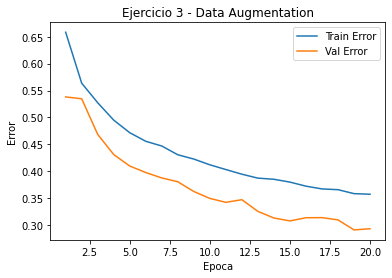

313/313 [==============================] - 1s 3ms/step - loss: 0.8988 - accuracy: 0.6954
Test error en el modelo final: 0.3046000003814697


In [ ]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 3 - Data Augmentation')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final: {1 - test_acc}")

### Conclusiones

no hace mucha diferencia, no se pueden aplicar transformaciones que modifiquen el tamaño de la imagen porq se vuelve todo loco